In [1]:
import pandas as pd
import numpy as np
import keras as kr
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
md_para = pd.read_csv('../data/substituted_benzene_para_md.csv',index_col=0,header=0)
md_orth = pd.read_csv('../data/substituted_benzene_orth_md.csv',index_col=0,header=0)
md_meta = pd.read_csv('../data/substituted_benzene_meta_md.csv',index_col=0,header=0)
mddata = pd.concat([md_meta,md_orth,md_para],axis=0,join='inner',ignore_index=True)

In [8]:
gammadata_meta = pd.read_csv('../data/substituted_benzene_meta_gamma.csv',index_col=0,header=0)
gammadata_orth = pd.read_csv('../data/substituted_benzene_orth_gamma.csv',index_col=0,header=0)
gammadata_para = pd.read_csv('../data/substituted_benzene_para_gamma.csv',index_col=0,header=0)
gammadata = pd.concat([gammadata_meta,gammadata_orth,gammadata_para],axis=0,join='inner',ignore_index=True)

In [9]:
def dfclean(data):
    temp = data[data.T[data.dtypes!=np.object].index]
    kk=[]
    for column in temp.columns:
        if len(set(temp[column]))<4:
            kk.append(column)
    result = temp.drop(columns=kk)
    return result

In [10]:
rawdata = pd.merge(mddata, gammadata, on='cindex')
dataset = dfclean(rawdata)

In [11]:
dataset

,ABC,ABCGG,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,magnitude_gamma
0,5.875634,5.566041,9.431148,2.175328,4.350655,9.431148,1.178893,2.979741,2.736735,0.342092,...,35.755147,111.048427,7.932031,61,7,36.0,38.0,3.222222,1.833333,9179.023
1,7.358797,6.989468,11.908678,2.242838,4.485676,11.908678,1.190868,3.197246,2.988082,0.298808,...,39.160939,154.018543,9.059914,117,11,46.0,50.0,4.333333,2.277778,12906.820
2,5.875634,5.566041,9.431148,2.175328,4.350655,9.431148,1.178893,2.979741,2.736735,0.342092,...,35.755147,126.023628,8.401575,61,7,36.0,38.0,3.222222,1.833333,10334.300
3,9.785874,9.203562,14.978073,2.344507,4.689013,14.978073,1.152159,3.464600,3.323177,0.255629,...,44.214989,200.014330,9.524492,240,17,64.0,71.0,6.395833,2.777778,12758.570
4,8.841960,8.356358,14.379234,2.288246,4.576491,14.379234,1.198270,3.375790,3.213997,0.267833,...,42.251151,162.068080,7.366731,197,15,56.0,62.0,5.444444,2.722222,16212.820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,8.704061,7.942227,14.526815,2.236068,4.472136,14.526815,1.210568,3.368123,3.186555,0.265546,...,41.755182,166.062994,7.548318,217,13,54.0,58.0,4.833333,2.833333,17855.020
356,7.071068,6.693944,12.857279,2.214320,4.428639,12.857279,1.285728,3.188884,2.963010,0.296301,...,38.792641,136.100048,6.186366,125,11,44.0,48.0,3.722222,2.500000,13104.490
357,8.704061,7.942227,14.526815,2.236068,4.472136,14.526815,1.210568,3.368123,3.186555,0.265546,...,41.755182,161.047678,8.476194,217,13,54.0,58.0,4.833333,2.833333,13675.160
358,5.875634,5.525875,9.924777,2.170086,4.340173,9.924777,1.240597,2.979730,2.742040,0.342755,...,35.730685,127.018877,9.072777,62,7,36.0,38.0,3.222222,1.833333,21277.000


In [12]:
Y = dataset.iloc[:, -1]
Y = np.array(Y, dtype = np.float32)

X = dataset.iloc[:, 1:-4]
X = np.array(X, dtype = np.float32)

#X= StandardScaler().fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=42)
model = Sequential()
model.add(Dense(units = 50, input_dim = X.shape[1]))
model.add(Activation("sigmoid"))
model.add(Dense(units = 1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                64350     
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 64,401
Trainable params: 64,401
Non-trainable params: 0
_________________________________________________________________


In [6]:
#SGD是随机梯度下降法。 nesterov是Nesterov的加速度梯度下降法。
model.compile(loss = 'mean_squared_error', optimizer = SGD(lr = 0.001, momentum = 0.9, nesterov = True),metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 200, batch_size = 32,validation_data = (X_test, y_test),verbose=0)
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
y_pred = model.predict(X_test)
rms = (np.mean((y_test - y_pred) ** 2)) ** 0.5
#s = np.std(y_test - y_pred)
print("Neural Network RMS", rms)

Test loss: 0.01491713896393776
Test accuracy: 0.0
Neural Network RMS 0.1578749915362346


<Figure size 432x288 with 0 Axes>

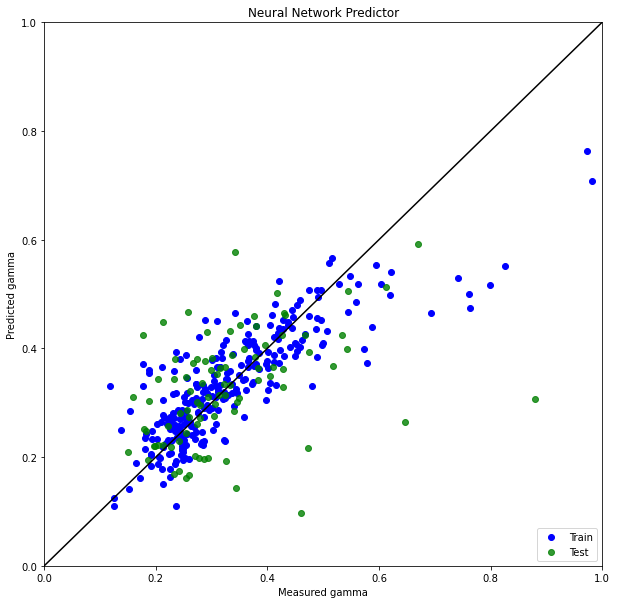

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(y_train, model.predict(X_train), label = 'Train', c = 'blue')
plt.title('Neural Network Predictor')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Measured gamma')
plt.ylabel('Predicted gamma')
plt.scatter(y_test, model.predict(X_test), c = 'green', label = 'Test', alpha = 0.8)
plt.plot([0,1],[0,1],c = 'k')
plt.legend(loc = 4)
#plt.savefig('Neural Network Predictor.png', dpi=500)
plt.show()

the value of test loss is little better than ecfp

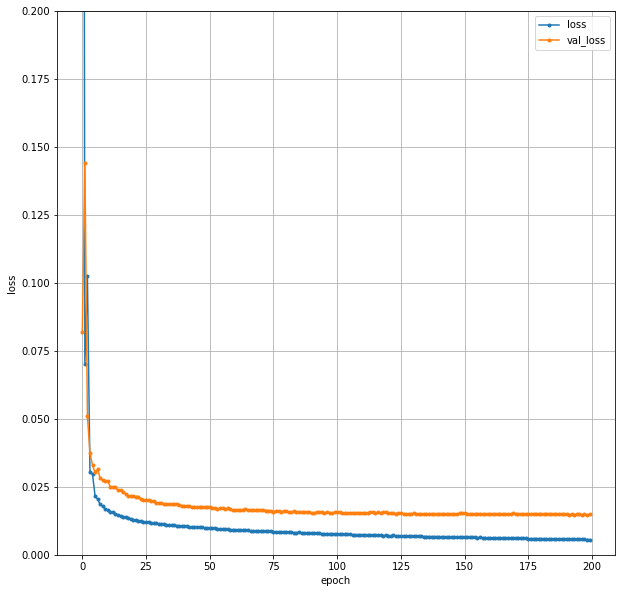

In [10]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(loss)
plt.figure(figsize=(10,10))
plt.ylim(0,0.2)
plt.plot(range(epochs), loss, marker = '.', label = 'loss')
plt.plot(range(epochs), val_loss, marker = '.', label = 'val_loss')
plt.legend(loc = 'best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
#plt.savefig('loss & val_loss for epochs.png', dpi=500)
plt.show()